In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings(action='ignore')

In [9]:
baseball=pd.read_csv('baseball.csv')

In [10]:
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [11]:
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [12]:
baseball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [13]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
baseball.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [15]:
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [16]:
#finding the null data
baseball.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [17]:
#finding duplicated data
baseball.duplicated().sum()

0

In [18]:
baseball.shape

(30, 17)

In [19]:
baseball['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [20]:
baseball['AB'].value_counts()

5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64

# Finding Skewness

In [21]:
baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [22]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(baseball))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [23]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [24]:
baseball_new=baseball[(z<3).all(axis=1)]

In [25]:
baseball_new.shape

(29, 17)

In [26]:
baseball=baseball_new
baseball.shape

(29, 17)

In [27]:
baseball=baseball.drop(columns='ERA',axis=1)

In [28]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,11.000000,21.000000,62.000000,126.000000


# Correlation

In [29]:
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,-0.030708,-0.104602,-0.179741,0.082702


# Classification of Data

In [30]:

X=baseball.drop(columns=['W'],axis=1)

In [31]:
print(X)

      R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER  CG  SHO  SV    E
0   724  5575  1497  300  42  139  383   973  104  641  601   2    8  56   88
1   696  5467  1349  277  44  156  439  1264   70  700  653   2   12  45   86
2   669  5439  1395  303  29  141  533  1157   86  640  584  11   10  38   79
3   622  5533  1381  260  27  136  404  1231   68  701  643   7    9  37  101
4   689  5605  1515  289  49  151  455  1259   83  803  746   7   12  35   86
6   764  5567  1397  272  19  212  554  1227   63  698  652   3    4  48   93
7   713  5485  1370  246  20  217  418  1331   44  693  646   0   10  43   77
8   644  5485  1383  278  32  167  436  1310   87  642  604   1   12  60   95
9   748  5640  1495  294  33  161  478  1148   71  753  694   3   10  40   97
10  751  5511  1419  279  32  172  503  1233  101  733  680   5    9  45  119
11  729  5459  1363  278  26  230  486  1392  121  618  572   5   13  39   85
12  661  5417  1331  243  21  176  435  1150   52  675  630   2 

In [32]:
Y=baseball['W']

In [33]:
print(Y)

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


# Data Visualization

<Axes: >

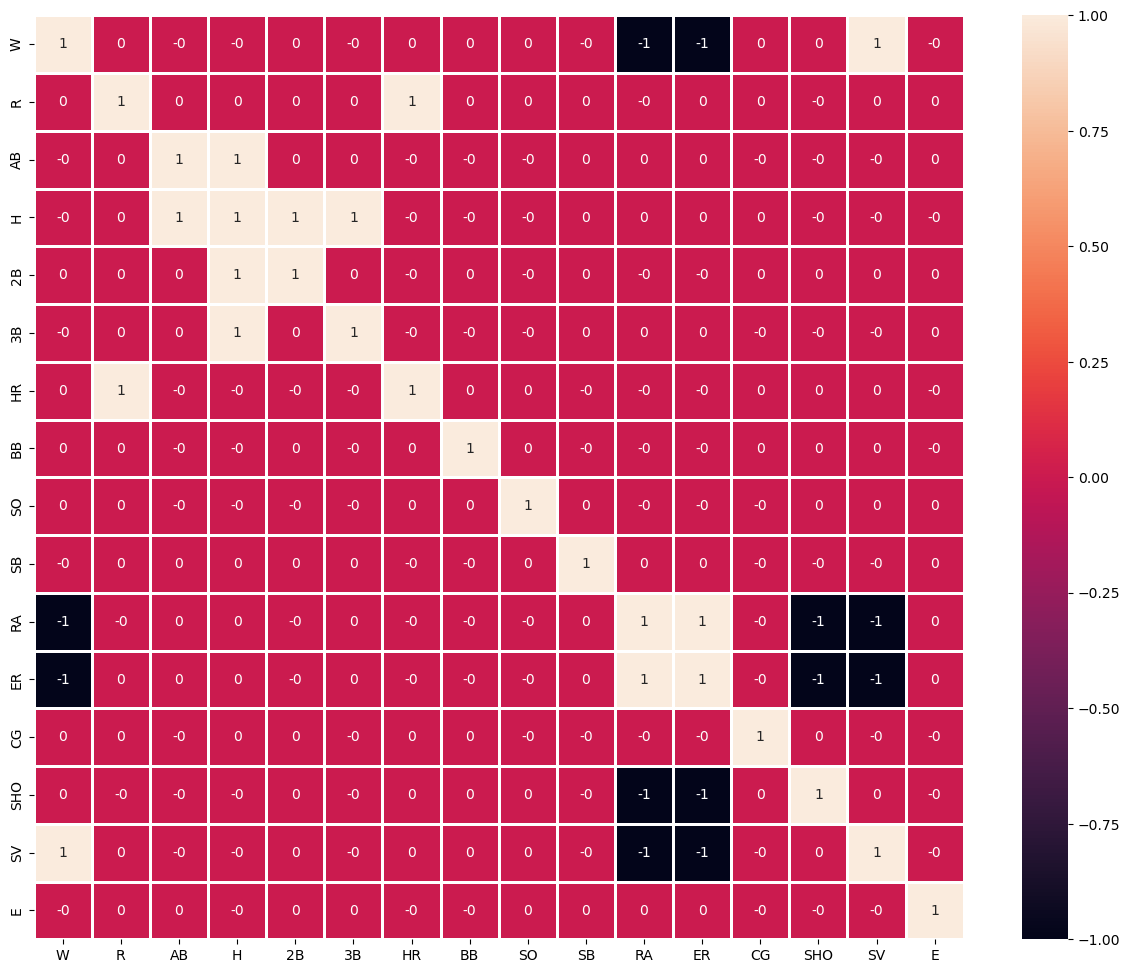

In [338]:
corr_hmap = baseball.corr()
plt.figure(figsize=(15,12))
sns.heatmap(round(corr_hmap),linewidth=2,annot=True)

# Univariate Analysis

# CountPlot

<function matplotlib.pyplot.show(close=None, block=None)>

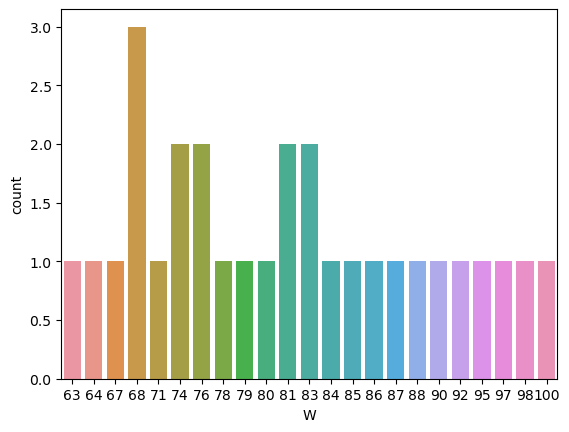

In [339]:

sns.countplot(x ='W', data = baseball)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

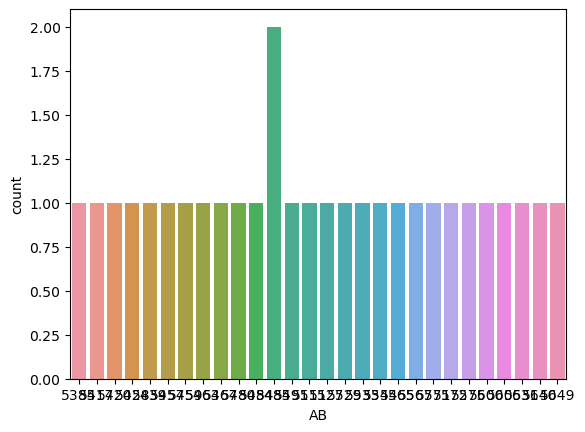

In [340]:

sns.countplot(x ='AB', data = baseball)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

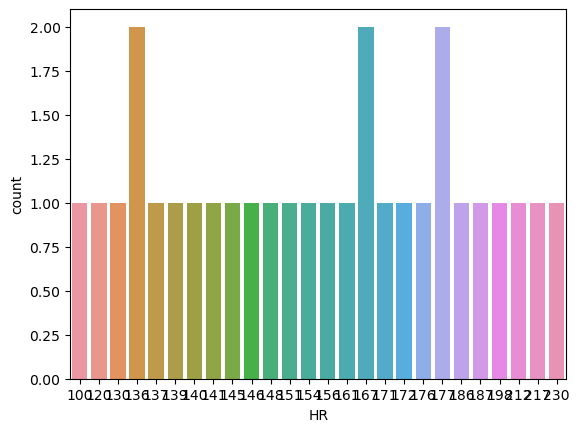

In [341]:

sns.countplot(x ='HR', data = baseball)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

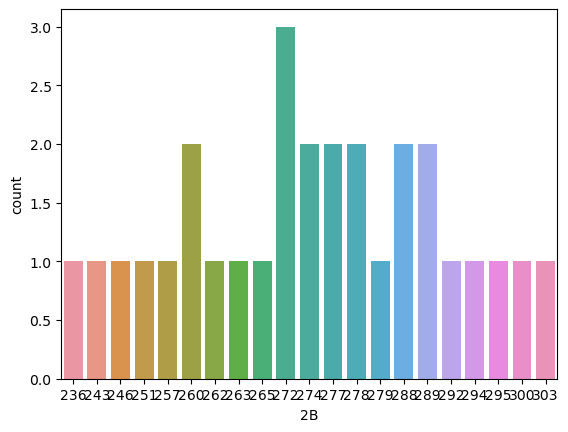

In [342]:

sns.countplot(x ='2B', data = baseball)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

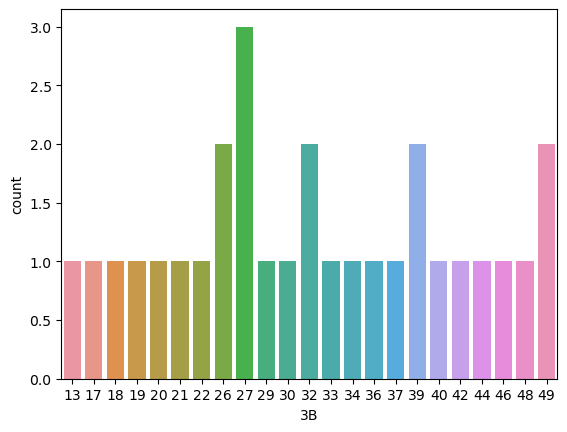

In [343]:

sns.countplot(x ='3B', data = baseball)
plt.show

# DistPlot

<function matplotlib.pyplot.show(close=None, block=None)>

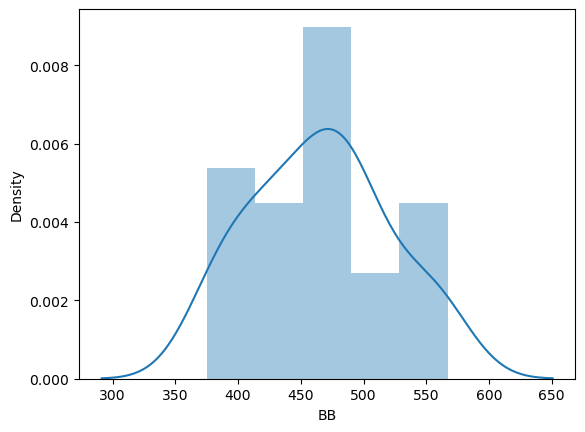

In [344]:
sns.distplot(baseball['BB'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

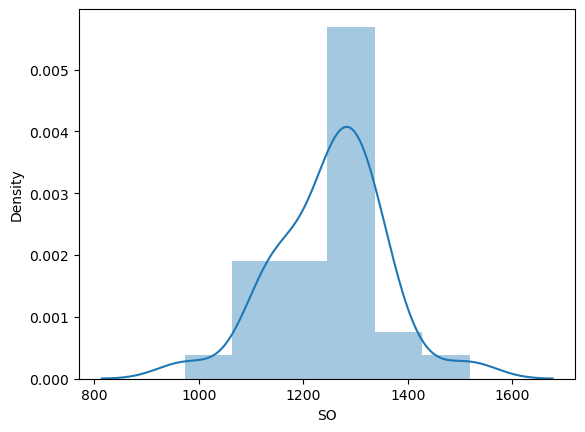

In [345]:
sns.distplot(baseball['SO'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

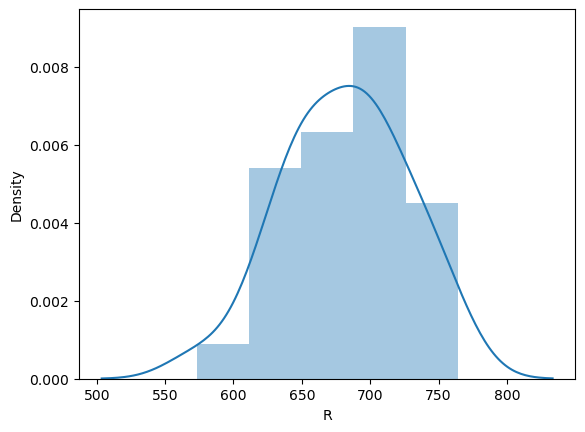

In [346]:
sns.distplot(baseball['R'])
plt.show

# Kde Plot

<Axes: xlabel='W', ylabel='Density'>

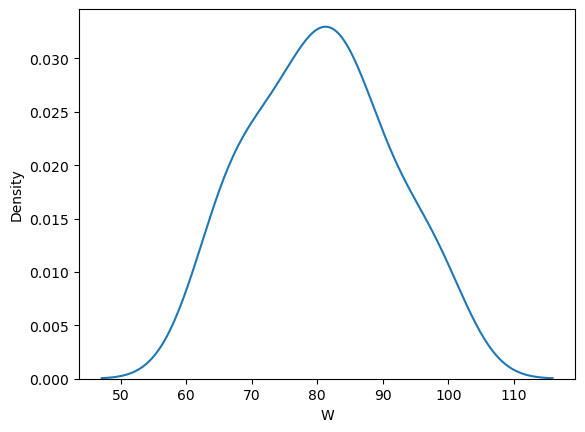

In [347]:
sns.kdeplot(data=baseball.W)

<Axes: xlabel='RA', ylabel='Density'>

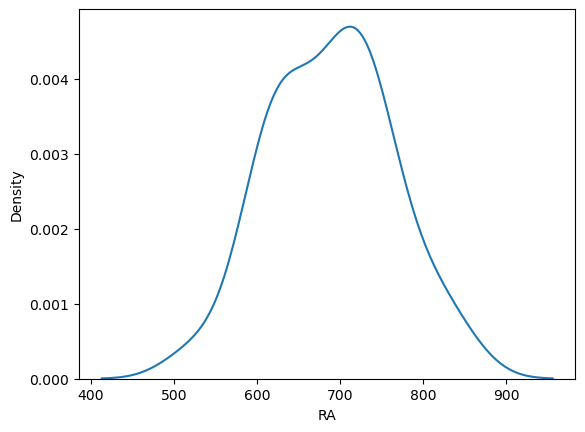

In [348]:
sns.kdeplot(data=baseball.RA)

<Axes: xlabel='SB', ylabel='Density'>

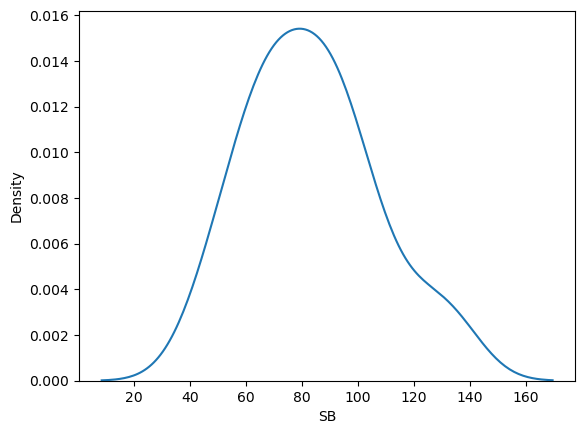

In [349]:
sns.kdeplot(data=baseball.SB)

# Bivariate Analysis

# Bar Plot

<Axes: xlabel='W', ylabel='R'>

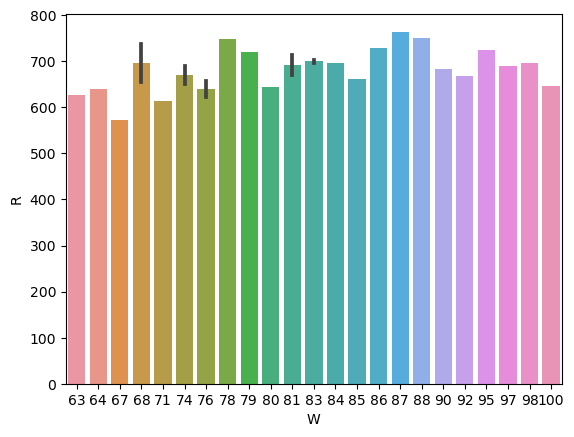

In [350]:
sns.barplot(x='W',y='R',data=baseball)

<Axes: xlabel='W', ylabel='AB'>

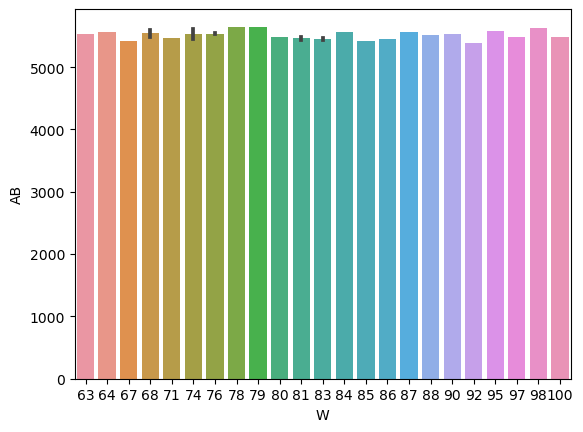

In [351]:
sns.barplot(x='W',y='AB',data=baseball)

<Axes: xlabel='AB', ylabel='R'>

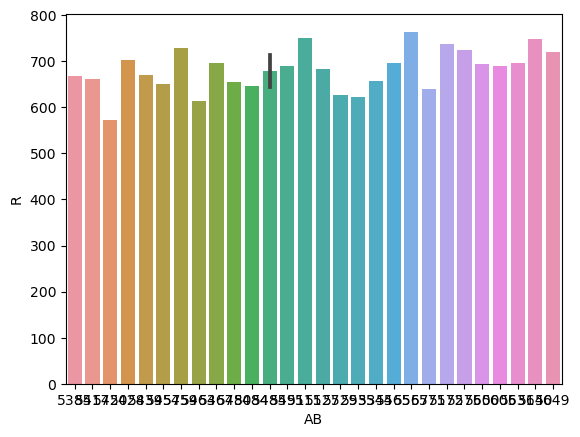

In [352]:
sns.barplot(x='AB',y='R',data=baseball)

<Axes: xlabel='RA', ylabel='R'>

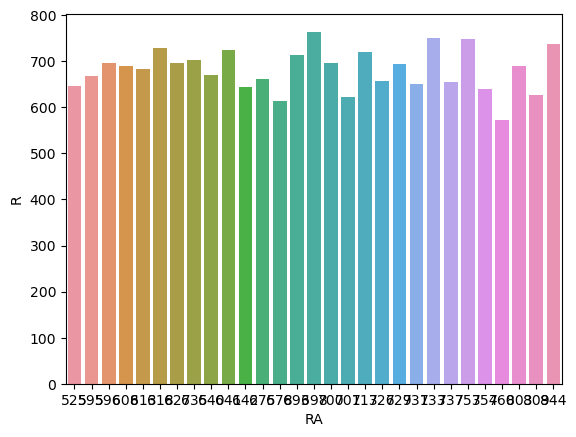

In [353]:
sns.barplot(x='RA',y='R',data=baseball)

# Joint Plot

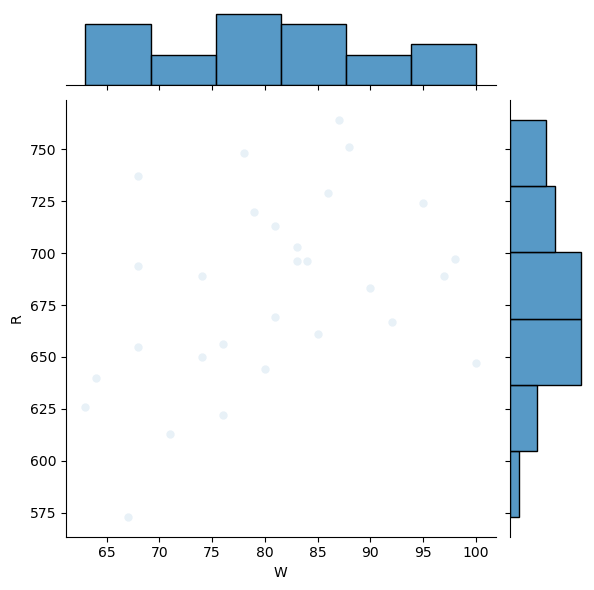

In [354]:
from scipy.stats import pearsonr
sns.jointplot(x='W', y='R', data=baseball, alpha = 0.1)

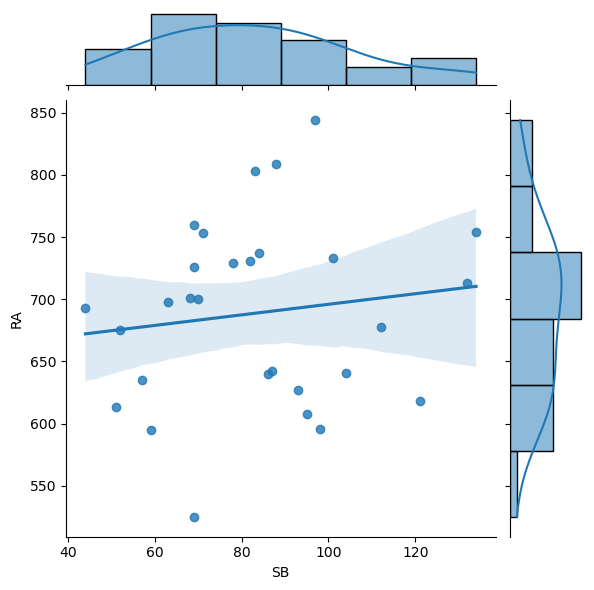

In [355]:
from scipy.stats import pearsonr
sns.jointplot(x='SB', y='RA', data=baseball,kind='reg')

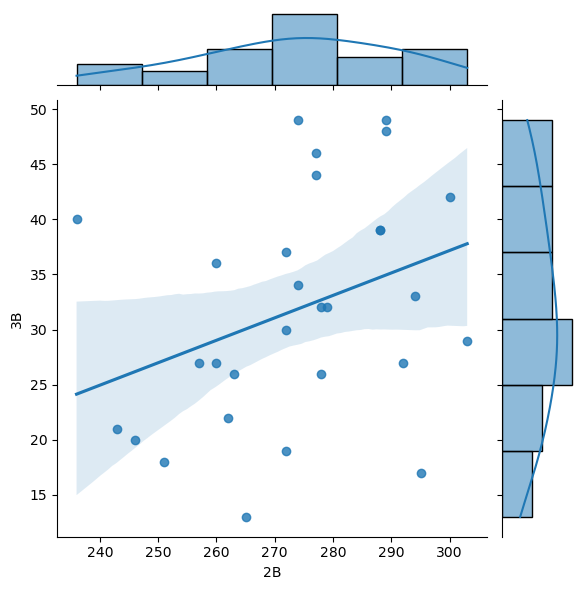

In [356]:
from scipy.stats import pearsonr
sns.jointplot(x='2B', y='3B', data=baseball, kind='reg')

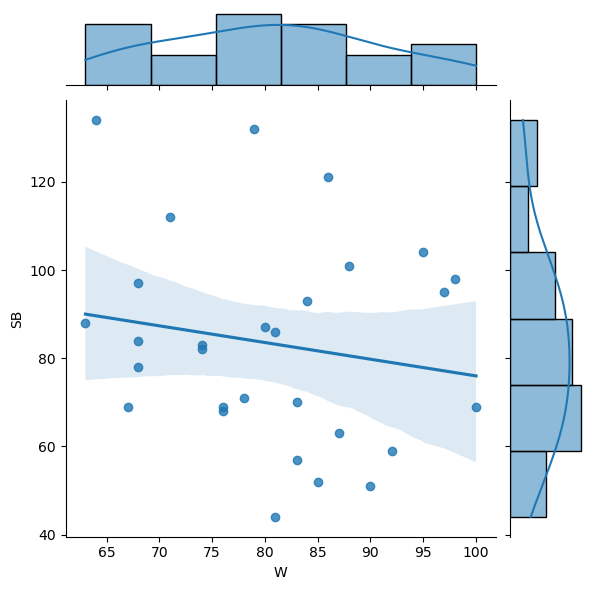

In [357]:
from scipy.stats import pearsonr
sns.jointplot(x='W', y='SB', data=baseball,kind='reg')

# Box Plot

W         Axes(0.125,0.747241;0.133621x0.132759)
R      Axes(0.285345,0.747241;0.133621x0.132759)
AB      Axes(0.44569,0.747241;0.133621x0.132759)
H      Axes(0.606034,0.747241;0.133621x0.132759)
2B     Axes(0.766379,0.747241;0.133621x0.132759)
3B        Axes(0.125,0.587931;0.133621x0.132759)
HR     Axes(0.285345,0.587931;0.133621x0.132759)
BB      Axes(0.44569,0.587931;0.133621x0.132759)
SO     Axes(0.606034,0.587931;0.133621x0.132759)
SB     Axes(0.766379,0.587931;0.133621x0.132759)
RA        Axes(0.125,0.428621;0.133621x0.132759)
ER     Axes(0.285345,0.428621;0.133621x0.132759)
CG      Axes(0.44569,0.428621;0.133621x0.132759)
SHO    Axes(0.606034,0.428621;0.133621x0.132759)
SV     Axes(0.766379,0.428621;0.133621x0.132759)
E          Axes(0.125,0.26931;0.133621x0.132759)
dtype: object

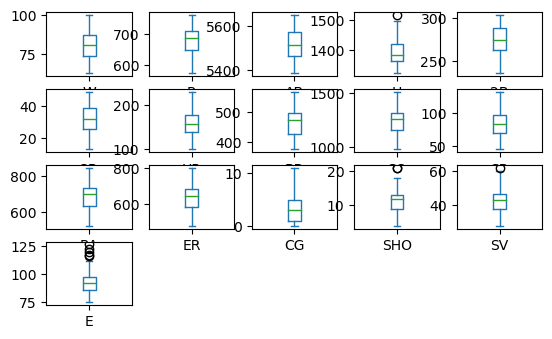

In [358]:
baseball.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

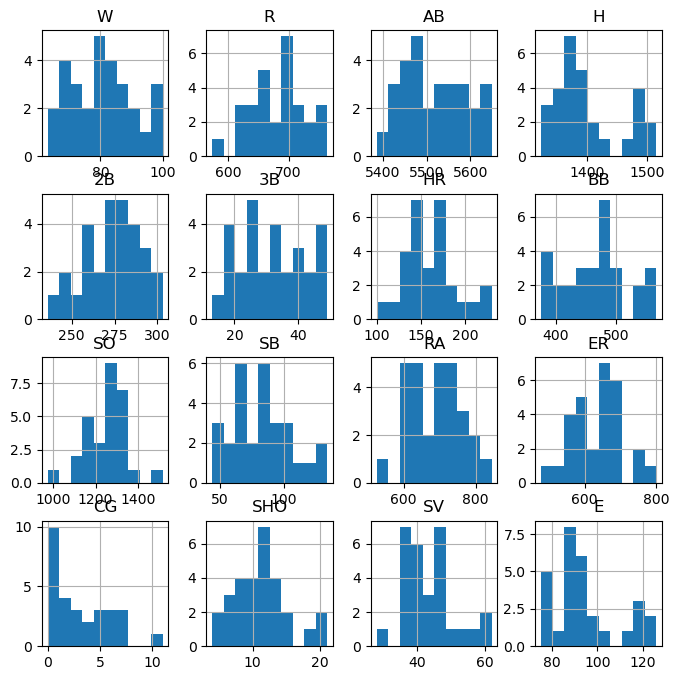

In [359]:
baseball.hist(figsize=(8,8),bins=10)
plt.show()

# Pair Plot

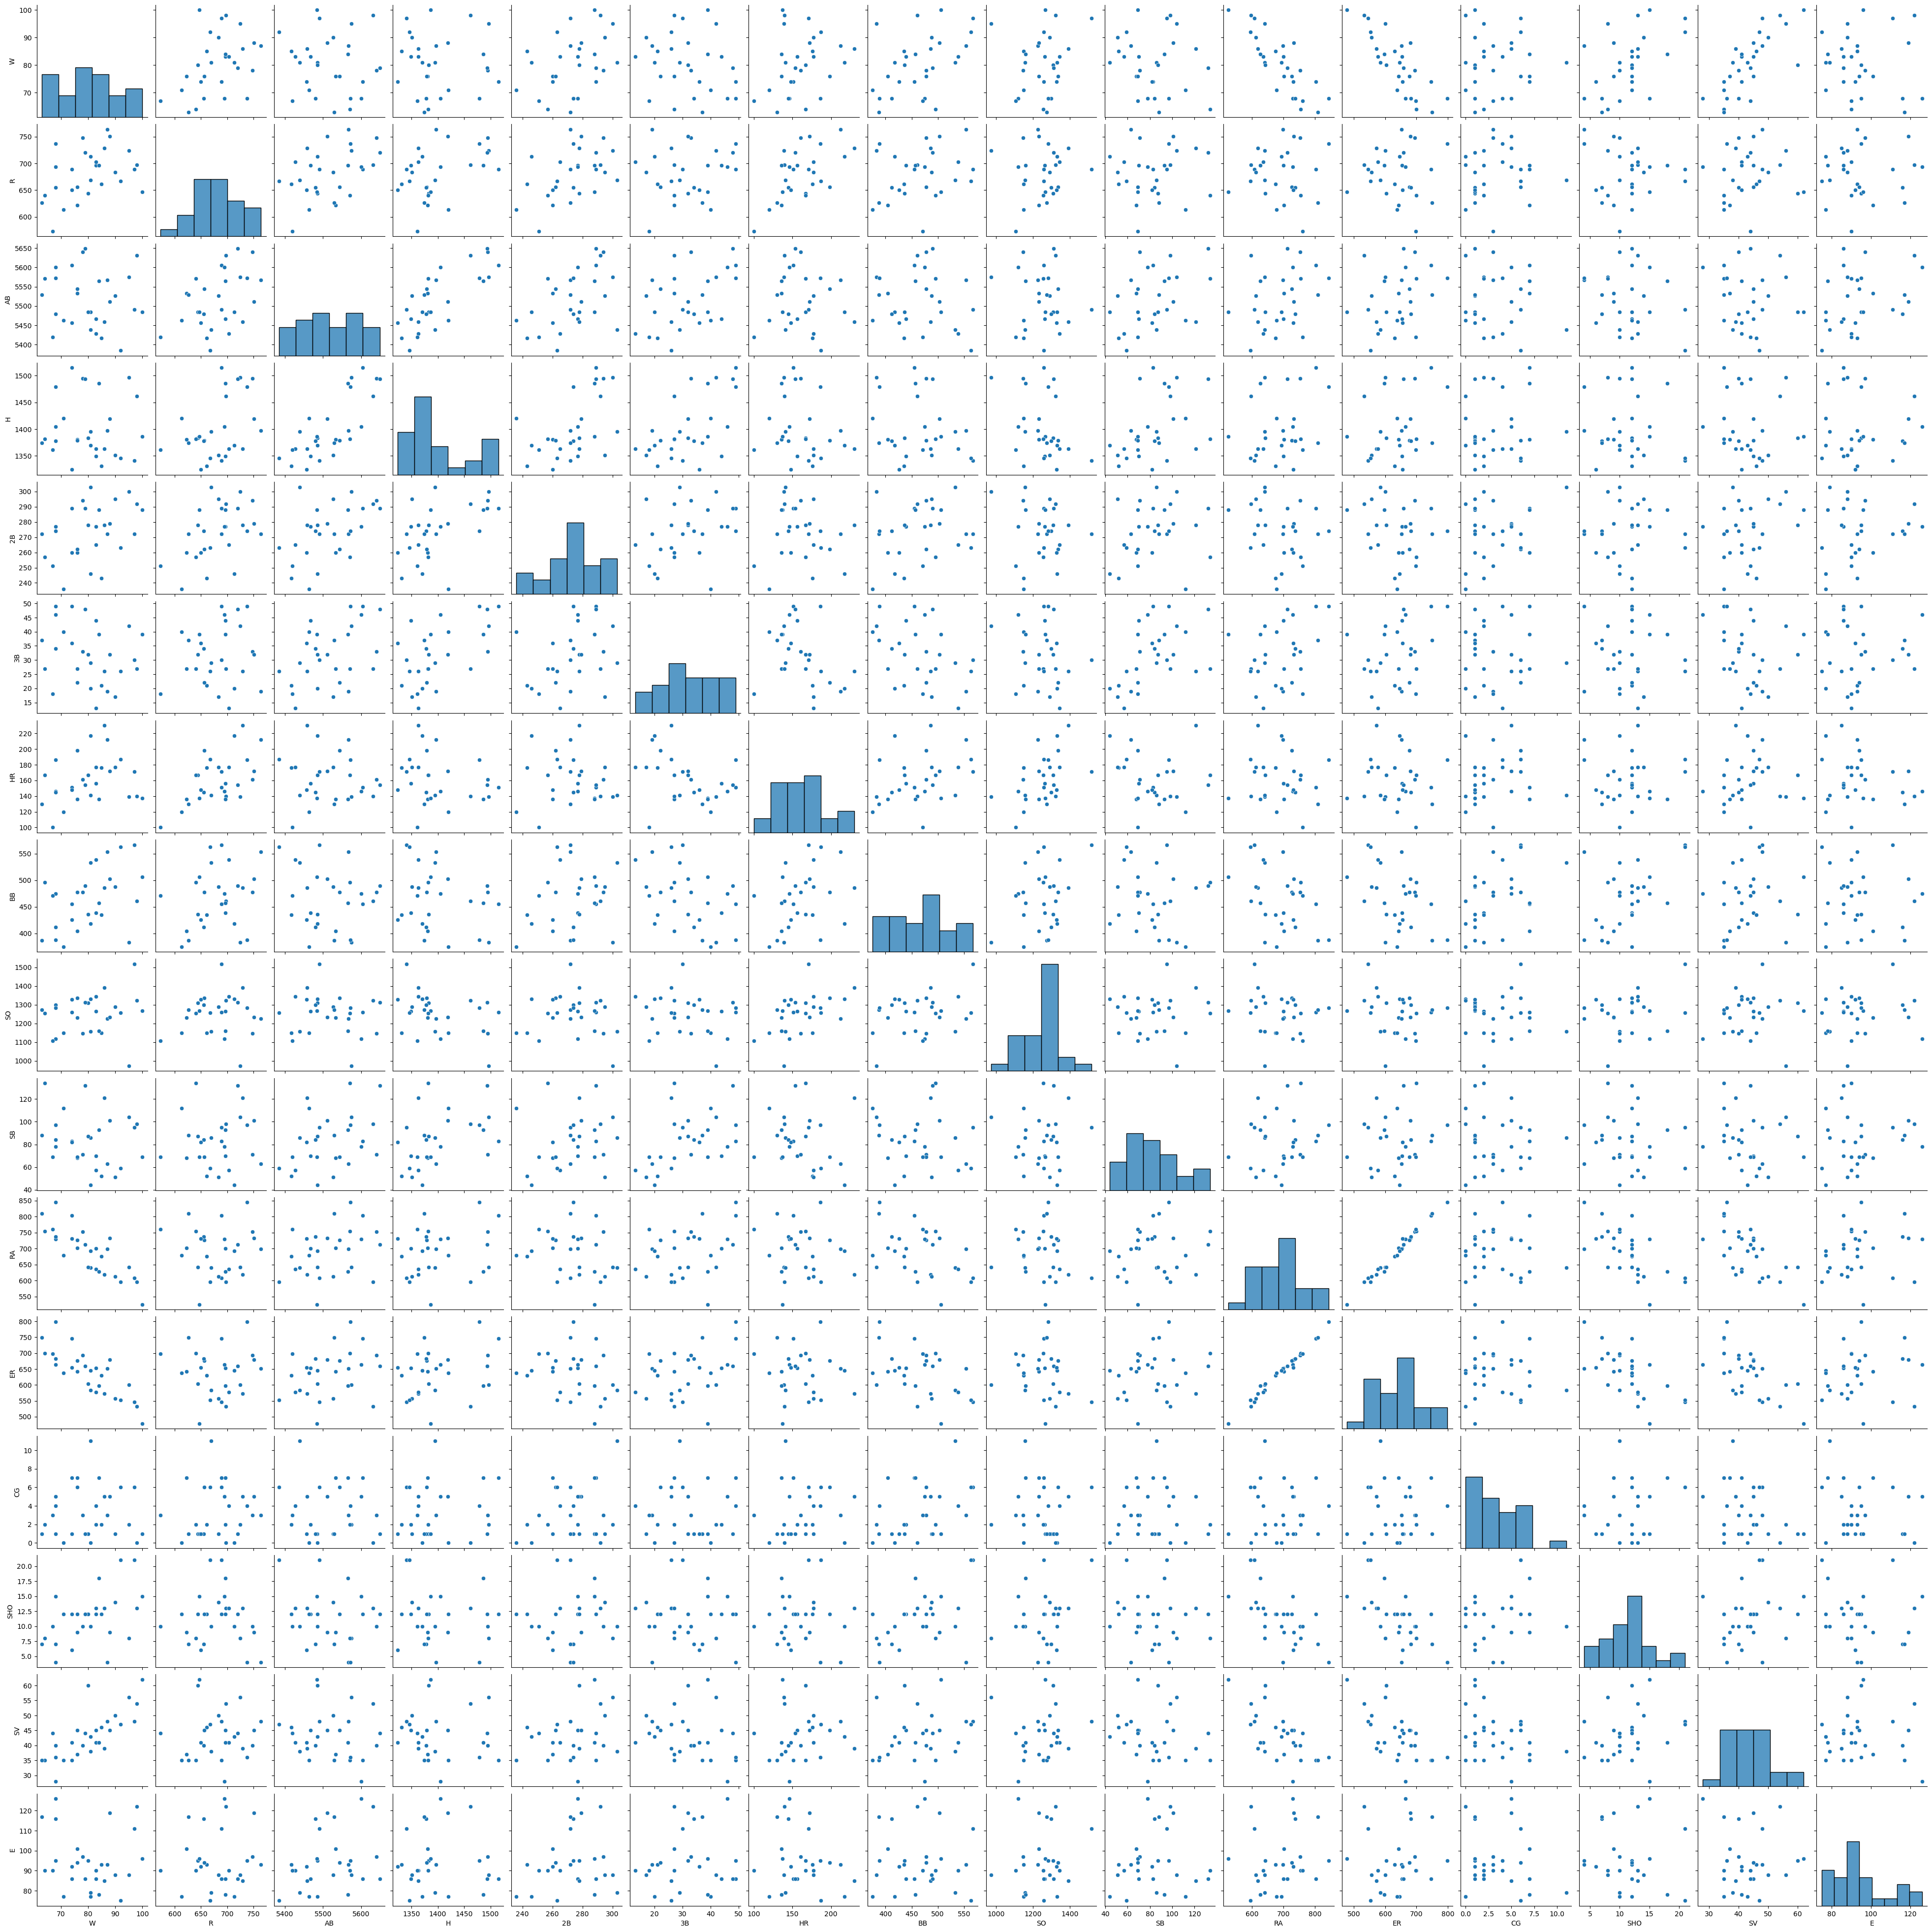

In [360]:
sns.pairplot(baseball)

# Scatter Plot

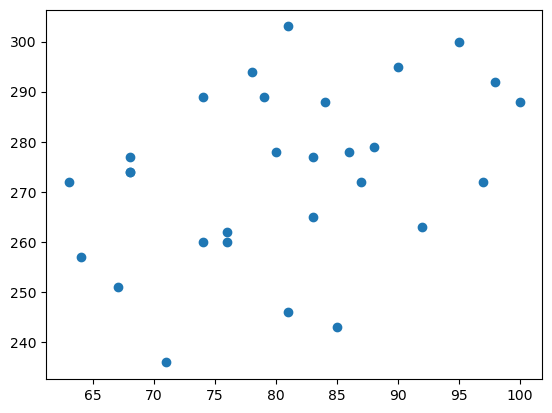

In [361]:
plt.scatter(baseball['W'],baseball['2B'])
plt.show()

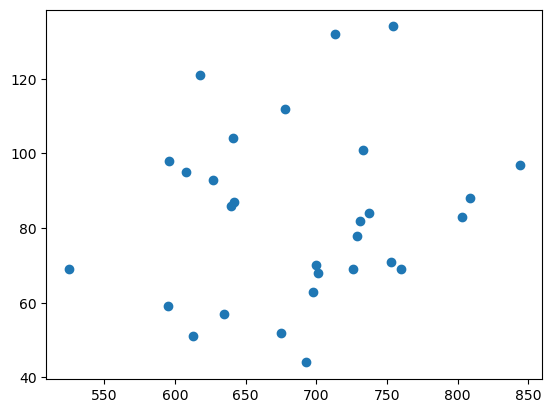

In [362]:
plt.scatter(baseball['RA'],baseball['SB'])
plt.show()

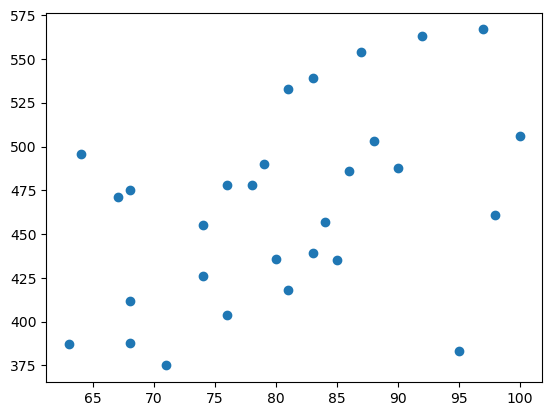

In [72]:
plt.scatter(baseball['W'],baseball['BB'])
plt.show()

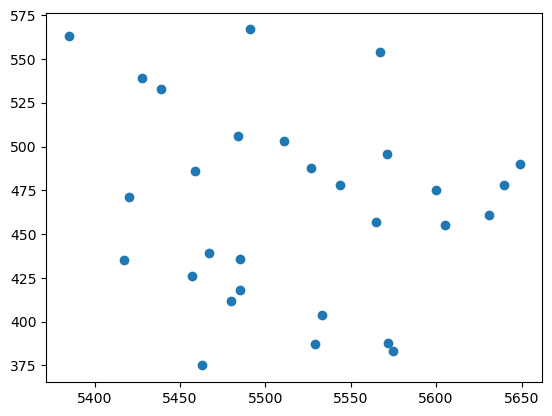

In [363]:
plt.scatter(baseball['AB'],baseball['BB'])
plt.show()

# Pair Plot

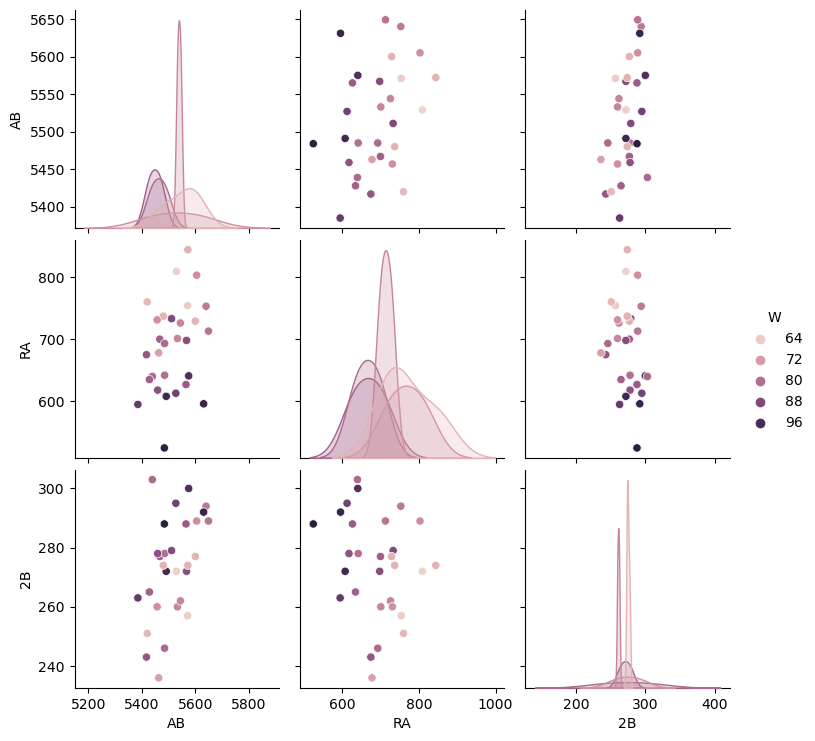

In [364]:
sns.pairplot(data=baseball,hue='W',vars=['AB','RA','2B'])

# Training The Model

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [35]:
x_train.shape

(20, 15)

In [36]:
y_train.shape

(20,)

In [37]:
x_test.shape

(9, 15)

In [38]:
y_train.shape

(20,)

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(x_train,y_train)

LinearRegression()

In [41]:
lm.coef_

array([ 0.14259252,  0.00472566, -0.00912279, -0.13654752,  0.00466676,
       -0.0548366 , -0.0346768 , -0.00820277,  0.02302091,  0.39141349,
       -0.45148858,  0.81153125,  0.44530454,  0.93473406, -0.16028051])

In [42]:
lm.intercept_

26.17524725033489

In [43]:
lm.score(x_train,y_train)

0.9480504640599712

In [44]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [82.80977199 94.59519348 76.57619821 73.50574686 82.80220478 84.69834631
 71.01517262 97.8194195  84.55589087]
actual price: 28    74
17    97
13    76
23    67
9     78
10    88
22    71
0     95
27    79
Name: W, dtype: int64


In [45]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 3.8656516727077497
Mean squared error: 22.09236570352489
Root mean squared error: 4.700251663850021


In [46]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.7746244808582473


In [47]:
#testing the data
i=np.array([655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,116])
i.shape

(15,)

In [48]:
i=i.reshape(1,-1)
i.shape

(1, 15)

In [49]:
lm.predict(i)

array([37.10939868])

In [50]:
knn=KNeighborsRegressor()

In [51]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [52]:
predknn=knn.predict(x_test)

In [53]:
knn.score(x_train,y_train)

0.7322164767542527

In [54]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 3.8656516727077497
Mean squared error: 22.09236570352489
r2 score 0.08979848866498752


In [55]:
svm=SVR()

In [56]:
svm.fit(x_train,y_train)

SVR()

In [57]:
predsvm=svm.predict(x_test)

In [58]:
svm.score(x_train,y_train)

-0.01703802553310929

In [59]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 3.8656516727077497
Mean squared error: 22.09236570352489
r2 score -0.01963792911662754


In [60]:
dtc=DecisionTreeRegressor()

In [61]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
preddtc=dtc.predict(x_test)

In [68]:
dtc.score(x_train,y_train)

1.0

In [69]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 3.8656516727077497
Mean squared error: 22.09236570352489
r2 score -0.23551637279596993


In [70]:
rfc=RandomForestRegressor()

In [71]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
predrfc=rfc.predict(x_test)

In [73]:
rfc.score(x_train,y_train)

0.9660380916727112

In [81]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 3.8656516727077497
Mean squared error: 22.09236570352489
r2 score 0.43761947103274546


In [75]:
gb=GradientBoostingRegressor()

In [76]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [77]:
predgb=gb.predict(x_test)

In [80]:
gb.score(x_train,y_train)

0.9999999534867996

In [79]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,predgb)))

error:
Mean absolute error: 3.8656516727077497
Mean squared error: 22.09236570352489
r2 score -0.008917560634178257


In [82]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [83]:
#testing the model
pred=lasso.predict(x_test)

In [84]:
lasso.score(x_train,y_train)

0.9469028213213866

In [86]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,pred)))

error:
Mean absolute error: 3.638185765038762
Mean squared error: 17.7363601288254
r2 score 0.8190623211039223


In [87]:
lasso.coef_

array([ 0.1257049 ,  0.00450766, -0.00084676, -0.11596735,  0.01563354,
       -0.04453555, -0.02753246, -0.00607756,  0.00260116,  0.30537561,
       -0.37428567,  0.63598433,  0.33191382,  0.80677278, -0.1397516 ])

# KFold Validation
#comparing the models with best scores

In [90]:
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [91]:
print('The Best score for Linear Model is',score.mean())

The Best score for Linear Model is -154.00868671805753


In [92]:
k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)

In [93]:
print('The Best score for Lasso regression is',score.mean())

The Best score for Lasso regression is -2.3877125469735496


In [94]:

k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best score Decision Tree REgressor is',score.mean())

The Best score Decision Tree REgressor is -1.1949442115837479


In [95]:

k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best score Random Forest REgressor is',score.mean())

The Best score Random Forest REgressor is 0.3125791378020503


In [96]:

k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)
print('The Best score K neighbour Regressor is',score.mean())

The Best score K neighbour Regressor is 0.11151842349745808


In [477]:
k_folds=KFold(n_splits=5)
score=cross_val_score(gb,x_train,y_train,cv=k_folds)

In [478]:
print('The Best score for Gradient boosting is',score.mean())

The Best score for Gradient boosting is -0.01364897195328807


In [97]:

k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)
print('The Best score SVM is',score.mean())

The Best score SVM is -0.6422678026438395


# Hypertuning The Best Model

# Randomized Search

In [106]:
param_grid={'n_estimators':[50,60],'max_features':['auto','sqrt'],'min_samples_split':[7,9],'min_samples_leaf':[8,10],'bootstrap':[True,False]}

In [108]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=80,verbose=2,cv=5,random_state=30,n_jobs=-1)

In [109]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [8, 10],
                                        'min_samples_split': [7, 9],
                                        'n_estimators': [50, 60]})

In [110]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False}
Best Score -0.31728918829437525


In [111]:
r_fit=RandomForestRegressor(n_estimators= 50, min_samples_split= 9, min_samples_leaf= 8, max_features='sqrt', bootstrap=False)

In [112]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=9, n_estimators=50)

In [113]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [114]:
df

,Actual Data,predicted Data
28,74,76.521970
17,97,84.794318
13,76,78.058990
23,67,78.291061
9,78,76.577626
10,88,78.585152
22,71,77.693106
0,95,83.272399
27,79,78.455581


In [115]:
#Random Forest Regressor is the best model to predict the data